In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image
%matplotlib inline

In [3]:
def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

In [22]:
'''
cv2读取图片， 返回numpy array
色彩空间： BGR
'''
bgr_img = cv2.imread("imgs/gaki.jpg", 1)
print(type(bgr_img))
print(bgr_img.dtype)
print(bgr_img.shape) 
'''
imread(filename[,flag])
cv2.IMREAD_COLOR (デフォルト。カラーモードで読み込みます。アルファチャンネルは読み込みません)
cv2.IMREAD_GRAYSCALE（画像をグレースケールで読み込みます）
cv2.IMREAD_UNCHANGED（画像をそのまま読み込みます。アルファチャンネルも読み込みます）
フラグは、それぞれ文字列の代わりに1,0,-1と設定することもできます。
'''

<class 'numpy.ndarray'>
uint8
(168, 300, 3)


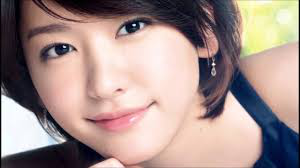

In [5]:
display_cv_image(bgr_img)

In [7]:
# 打开一个窗口显示图片
#等待键盘输入， 强制关闭图像窗口会导致python解释器崩溃
#不推荐用在jupyter
# imshow(windowname, img)
#imwrite(imagename, img) =>imagenameで拡張子を指定することができます
'''
cv2.imshow('image', bgr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

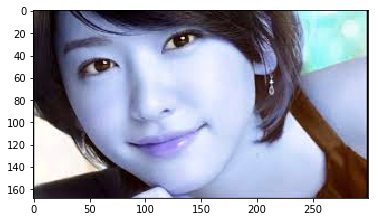

In [7]:
plt.imshow(bgr_img)
plt.show()

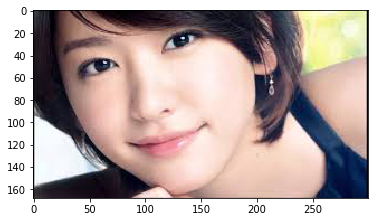

In [11]:
# cv2读取的图片数组是BGR模式，而plt显示的图片需要是RGB模式
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

In [13]:
print(type(rgb_img))
height, width, channels = rgb_img.shape
print(height, width, channels)

<class 'numpy.ndarray'>
168 300 3


In [15]:
import matplotlib.image as mpimg

<class 'numpy.ndarray'>
uint8
(168, 300, 3)


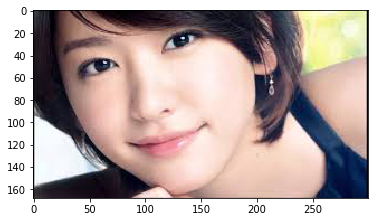

In [24]:
img = mpimg.imread("imgs/gaki.jpg")
print(type(img))
print(img.dtype)
print(img.shape) 
plt.imshow(img)
plt.show()

In [23]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img

Using TensorFlow backend.


<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
float32
(168, 300, 3)
uint8


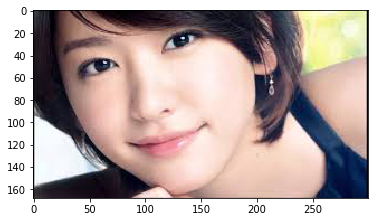

In [29]:
img = load_img("imgs/gaki.jpg")
img2 = img_to_array(img)
print(type(img)) # <class 'PIL.JpegImagePlugin.JpegImageFile'>
print(type(img2)) # <class 'numpy.ndarray'>
print(img2.dtype)
print(img2.shape) # (280, 300, 3)

img3 = img2.astype(np.uint8)
print(img3.dtype)
plt.imshow(img3)
plt.show()

float64


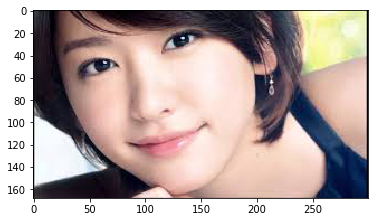

In [35]:
# 0から1までの小数に変換しても、plt.imshow() は問題なく画像を表示してくれる。
'''
Keras の load_img は PIL 形式での画像を読み込むので、
配列に変換するためには、img_to_array() を使う。この配列の shape は matplotlib の imread() が返す配列と同じ。
数値は 0 から 255 までの並びだが、型が小数になっているので、
plt.imshow() で画像を表示するには、255 で割るか、img.as_type(np.uint8)などとして整数型に変換する必要がある。

ImageDataGenerator 経由で得る画像もデフォルトでは 0から255までの数値（型は小数）で表現されている。つまり、img_to_array() の戻り値と同じ。
'''
img4 = img3/255
print(img4.dtype)
plt.imshow(img4)
plt.show()